In [2]:
import pandas as pd
import seaborn as sns

In [4]:
churn = pd.read_csv("Churn_Modelling.csv")


In [5]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
churn.shape

(10000, 14)

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [11]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
churn['Geography'].unique()
churn = pd.get_dummies( churn,drop_first = True)

In [13]:
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\Aman_pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

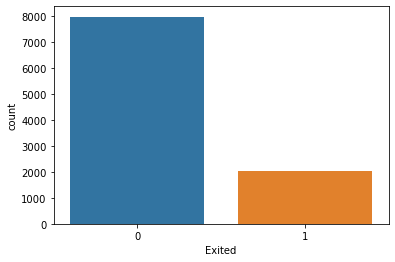

In [15]:
import seaborn as sns
sns.countplot(churn['Exited'])

In [16]:
X = churn.drop('Exited',axis = 1)
y = churn['Exited']

In [17]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts() 

1    7963
0    7963
Name: Exited, dtype: int64

# Test and traning the dataset

In [18]:
from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(x_test)

In [20]:
X_train

array([[-0.36121746, -0.80080574,  0.08090414, ..., -0.57034084,
        -0.46062878, -0.84006962],
       [ 1.09196452,  0.10464931, -1.38997531, ..., -0.57034084,
        -0.46062878,  1.19037753],
       [ 0.65491731, -1.70626079, -0.28681572, ..., -0.57034084,
        -0.46062878, -0.84006962],
       ...,
       [ 0.19601773,  0.20525543,  1.18406374, ..., -0.57034084,
        -0.46062878,  1.19037753],
       [-0.67807669,  0.6076799 , -0.65453559, ..., -0.57034084,
        -0.46062878, -0.84006962],
       [ 0.52380314,  1.01010437, -1.38997531, ...,  1.75333754,
        -0.46062878,  1.19037753]])

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [22]:
y_predict1 = lr.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict1)

0.7809165097300691

In [24]:
from sklearn.metrics import precision_score

In [25]:
precision_score(y_test,y_predict1)

0.7670206121174266

# Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [27]:
y_predict2 = dt.predict(x_test)
accuracy_score(y_test,y_predict2)

0.7818581293157565

In [28]:
precision_score(y_test,y_predict2)

0.7619047619047619

# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [30]:
y_predict3 = rf.predict(x_test)
accuracy_score(y_test,y_predict3)

0.8524795982423101

In [31]:
precision_score(y_test,y_predict3)

0.8403519798868636

# Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gd = GradientBoostingClassifier()

gd.fit(X_train,Y_train)

GradientBoostingClassifier()

In [33]:
y_predict4 = gd.predict(x_test)
accuracy_score(y_test,y_predict4)

0.8355304456999372

In [34]:
precision_score(y_test,y_predict4)

0.8270820089001907

In [35]:
final_data = pd.DataFrame({'Models':['LR','DT','RF','GBC'],'Accuracy':[accuracy_score(y_test,y_predict1),
                                                                  accuracy_score(y_test,y_predict2),
                                                                  accuracy_score(y_test,y_predict3),
                                                                  accuracy_score(y_test,y_predict4)]})

In [36]:
final_data

,Models,Accuracy
0,LR,0.780917
1,DT,0.781858
2,RF,0.852480
3,GBC,0.835530


C:\Users\Aman_pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

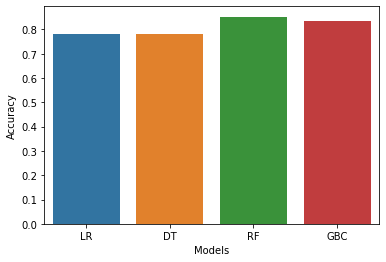

In [37]:
import seaborn as sns
sns.barplot(final_data['Models'],final_data['Accuracy'])

In [38]:
final_data = pd.DataFrame({'Models':['LR','DT','RF','GBC'],'Precision':[precision_score(y_test,y_predict1),
                                                                       precision_score(y_test,y_predict2),
                                                                       precision_score(y_test,y_predict3),
                                                                       precision_score(y_test,y_predict4)]})

In [39]:
final_data

,Models,Precision
0,LR,0.767021
1,DT,0.761905
2,RF,0.840352
3,GBC,0.827082


C:\Users\Aman_pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Precision'>

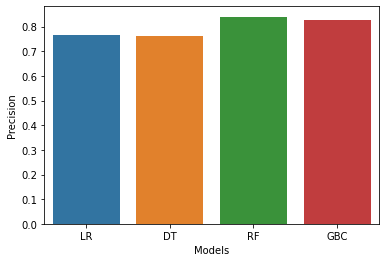

In [40]:
sns.barplot(final_data['Models'],final_data['Precision'])

# Save the Best Model

In [41]:
X_res = sc.fit_transform(X_res)
rf.fit(X_res,y_res)

RandomForestClassifier()

In [42]:
import joblib
joblib.dump(rf,'Churn Prediction Model')

['Churn Prediction Model']

In [43]:
model = joblib.load('Churn Prediction Model')

In [44]:
churn.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [47]:
# Predictiing the result of our model

model_Prediction = model.predict([[619,42,2,0.0,1,1,1,101348.88,0,0,0]])
if (model_Prediction == 1):
    print('The employee may leave the job :',model_Prediction)
else:
    print('The employee may not leave the job :',model_Prediction)

The employee may not leave the job : [0]
